In [34]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

In [24]:
def  loadDataSet():
    dataMat = []
    labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0,float(lineArr[0]),float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

In [29]:
def sigmoid(inX):
    return 1.0/(1+np.exp(-inX))

In [30]:
def gradAscent(dataMatIn,classLabels):
    dataMatrix = np.mat(dataMatIn)
    labelMat = np.mat(classLabels).transpose()
    m,n = np.shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = np.ones((n,1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix*weights)
        error = labelMat - h
        weights = weights + alpha * dataMatrix.transpose()*error
    return weights

In [31]:
dataArr,labelMat = loadDataSet()

In [41]:
weights = gradAscent(dataArr,labelMat)
print('weights',type(weights),weights)

weights <class 'numpy.matrixlib.defmatrix.matrix'> [[ 4.12414349]
 [ 0.48007329]
 [-0.6168482 ]]


In [45]:
def plotBestFit(wei):
    import matplotlib.pyplot as plt
    weights = wei.getA()
    dataMat,labelMat = loadDataSet()
    dataArr = np.array(dataMat)
    n = np.shape(dataArr)[0]
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1]);ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]);ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1,ycord1,s=30,c='red',marker='s')
    ax.scatter(xcord2,ycord2,s=30,c='green')
    x = np.arange(-3.0,3.0,0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x,y)
    plt.xlabel('X1');plt.ylabel('x2');
    plt.show()

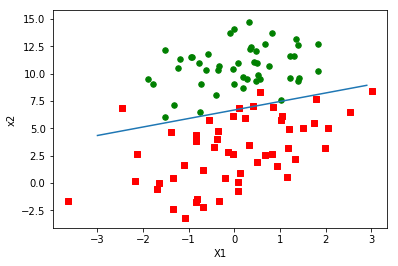

In [46]:
plotBestFit(weights)

In [52]:
def stocGradAscent0(dataMatrix,classLabels):
    print('dataMatrix',np.shape(dataMatrix))
    m,n = np.shape(dataMatrix)
    alpha = 0.01
    weights = np.ones(n)
    print('weights',np.shape(weights))
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]*weights))
        error = classLabels[i] - h
        weights = weights + alpha*error*dataMatrix[i]
    return weights

In [53]:
dataArr,labelMat = loadDataSet()


weights0 = stocGradAscent0(dataArr,labelMat)
plotBestFit(weights0)

dataMatrix (100, 3)
weights (3,)


TypeError: can't multiply sequence by non-int of type 'numpy.float64'